# PRACTICAL NO. 16
# AUC-ROC Curve

To study and understand the concept of ROC Curve and AUC in binary classification problems on Social_Network_Ads.csv dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
mapping = {'Male':0, 'Female':1}
df['Gender'] = df['Gender'].map(mapping)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19.0,19000.0,0
1,15810944,0,35.0,20000.0,0
2,15668575,1,26.0,43000.0,0
3,15603246,1,27.0,57000.0,0
4,15804002,0,19.0,76000.0,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [8]:
X = df[['Age', 'EstimatedSalary', 'Gender']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_probs = model.predict_proba(X_test)[:, 1]

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

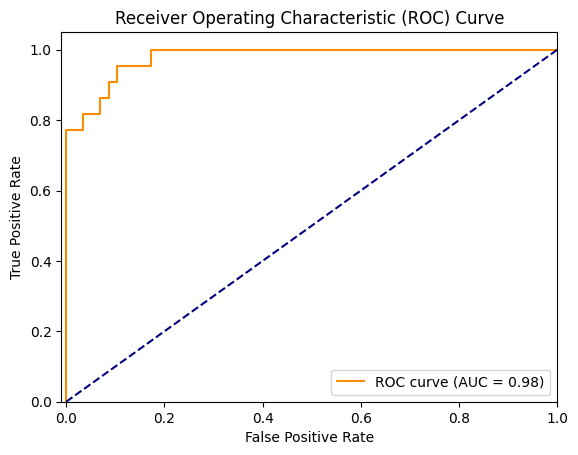

In [13]:
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()